<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Clase3_Normalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2021**
![dilbert-sampling-2.gif](attachment:dilbert-sampling-2.gif)

---
## Clase 3: Sesgo, normalización y escalado de datos

### Escalado vs Normalización 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import plotly.express as px

#import cufflinks as cf
#import plotly.graph_objs as go
#import chart_studio.plotly as py

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Use Plotly locally
#cf.go_offline()

import numpy as np
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

In [ ]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)
# column format only...
original_data = original_data.reshape(-1,1)



Text(0.5, 1.0, 'Scaled data')

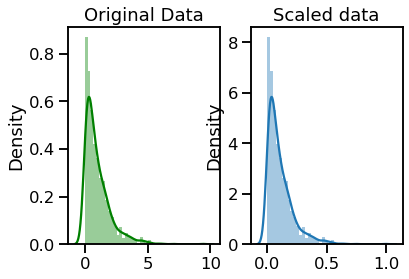

In [ ]:

 #scaler = MinMaxScaler((0,5))
    
scaled_feature = scaler.fit_transform(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0],color='Green')
ax[0].set_title("Original Data")
sns.distplot(scaled_feature, ax=ax[1])
ax[1].set_title("Scaled data")

### Melbourn dataset

In [ ]:
melb_data = pd.read_csv('melb_data.csv')
melb_data.shape


(13580, 21)

In [ ]:

melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.datasets import fetch_california_housing

In [ ]:
Price = melb_data.Price.values.copy().reshape(-1,1)

Distance = melb_data.Distance.values.copy().reshape(-1,1)

### MinMaxScaler

In [ ]:

Price_scaled =MinMaxScaler().fit_transform(Price)

Price_scaled_R = RobustScaler().fit_transform(Price)



Text(0.5, 1.0, 'Robust Scaled data')

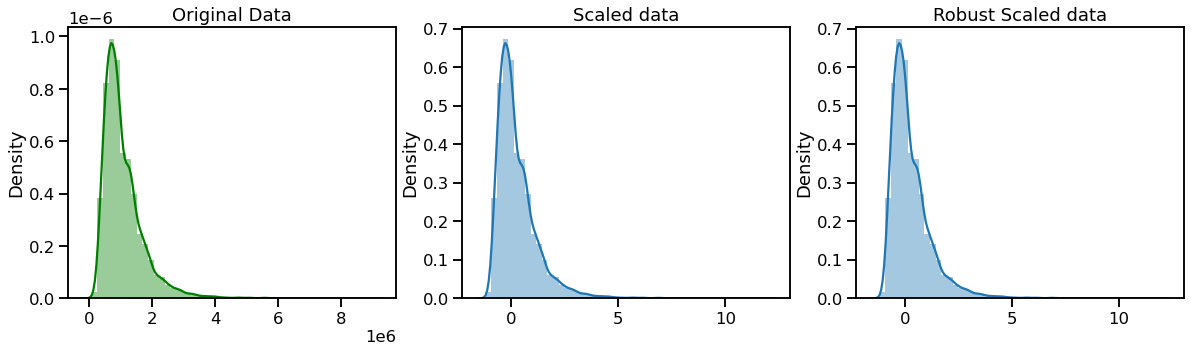

In [ ]:


# plot both together to compare
fig, ax=plt.subplots(1,3,figsize=(20,5))
sns.distplot(Price, ax=ax[0],color='Green')
ax[0].set_title("Original Data")

sns.distplot(Price_scaled, ax=ax[1])
ax[1].set_title("Scaled data")

sns.distplot(Price_scaled_R, ax=ax[2])
ax[2].set_title("Robust Scaled data")




Text(0.5, 1.0, 'Scaled data')

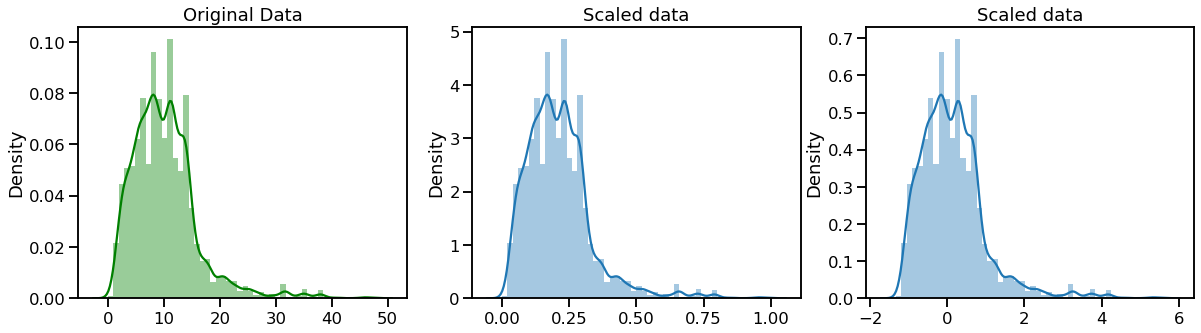

In [ ]:

Distance_scaled =MinMaxScaler().fit_transform(Distance)
Distance_scaled_R =RobustScaler().fit_transform(Distance)

# plot both together to compare
fig, ax=plt.subplots(1,3,figsize=(20,5))
sns.distplot(Distance, ax=ax[0],color='Green')
ax[0].set_title("Original Data")
sns.distplot(Distance_scaled, ax=ax[1])
ax[1].set_title("Scaled data")
sns.distplot(Distance_scaled_R, ax=ax[2])
ax[2].set_title("Scaled data")

### Transformación de BoxCox 

Looking at the power parameter  λ  of the boxcox transformation you can see that we are able to compress outliers more and more by chosing lower values of  λ . In addition we obtain a "negative" stretching of low original values lower than one. If we fix  λ=0.5  and vary the constant  c  we can observe only slight differences of the high values compression. On the other hand we can see that the stretching of low values is even stronger of constants c close to zero.

Take-away (not that simple but still good)
If you like to compress outliers - chose a low  λ 
If you like to stretch low values - chose a low  c  close to zero.
Transform!
Ok, let's go! If you like, fork and chose other values. You will see that the resulting clusters highly depend on these hyperparameters!

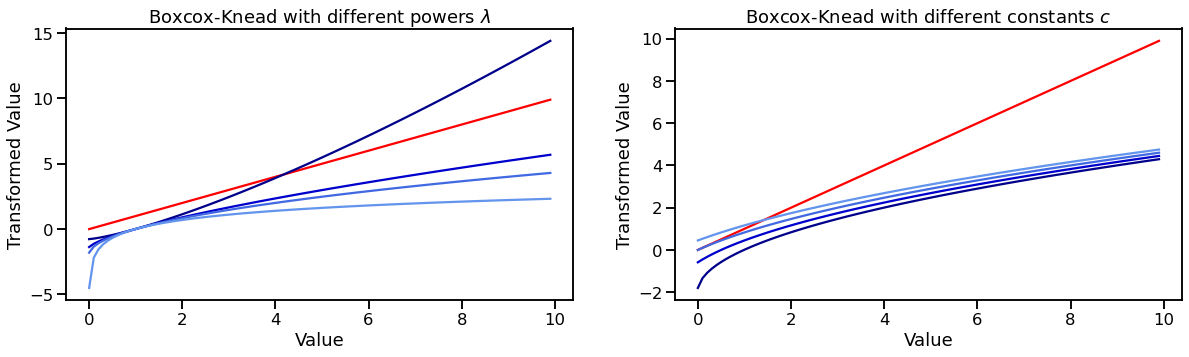

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

from scipy.stats import boxcox
to_knead = np.arange(0,10,0.1)

fig, ax = plt.subplots(1,2,figsize=(20,5))

k = ax[0].plot(to_knead, to_knead, color="Red", label="to_knead")
e1 = ax[0].plot(to_knead, boxcox(to_knead + 0.01, 1.3), color="darkblue", label="0.7")
e2 = ax[0].plot(to_knead, boxcox(to_knead + 0.01, 0.7), color="mediumblue", label="0.7")
e3 = ax[0].plot(to_knead, boxcox(to_knead + 0.01, 0.5), color="royalblue", label="0.5")
e4 = ax[0].plot(to_knead, boxcox(to_knead + 0.01, 0.01), color="cornflowerblue", label="0.01")
ax[0].set_title("Boxcox-Knead with different powers $\lambda$")
handles=[k, e1, e2, e3, e4]
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Transformed Value")
#ax[0].legend(handles)

k = ax[1].plot(to_knead, to_knead, color="Red", label="to_knead")
e1 = ax[1].plot(to_knead, boxcox(to_knead + 0.01, 0.5), color="darkblue", label="0.01")
e2 = ax[1].plot(to_knead, boxcox(to_knead + 0.5, 0.5), color="mediumblue", label="0.5")
e3 = ax[1].plot(to_knead, boxcox(to_knead + 1, 0.5), color="royalblue", label="1")
e4 = ax[1].plot(to_knead, boxcox(to_knead + 1.5, 0.5), color="cornflowerblue", label="1.5")
ax[1].set_title("Boxcox-Knead with different constants $c$")
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Transformed Value")
handles=[k, e1, e2, e3, e4]

### Ejercicio: Aplicar BoxCox a la variable Precio con diferentes c y lambdas. 

### Ejemplo de datos continuos

![__results___33_0.png](attachment:__results___33_0.png)